# UQ MATH2504: Project 3

My soltion to UQ MATH2504 Project 3: Analysis of Datasets and Basic ML Experiments <br><br>
By Joshua Crook S#: 46974408<br>
repo: https://github.com/joshuacrook400/Joshua-Crook-2504-2022-PROJECT3

## Task 1:  Housing Prices Data

In [52]:
using Plots, StatsPlots, StatsBase, Statistics, Query
include("src/MelbourneHousing.jl");
first(df, 5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date
,String31,String31,Int64,String1,Int64?,String3,String31,String15
1,Abbotsford,68 Studley St,2,h,missing,SS,Jellis,3/09/2016
2,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016
3,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016
4,Abbotsford,18/659 Victoria St,3,u,missing,VB,Rounds,4/02/2016
5,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017


### Task 1.1: Exploratory data of single variables

Comparing Price and number of rooms.

In [3]:
df_price = copy(df)
dropmissing!(df_price, :Price);

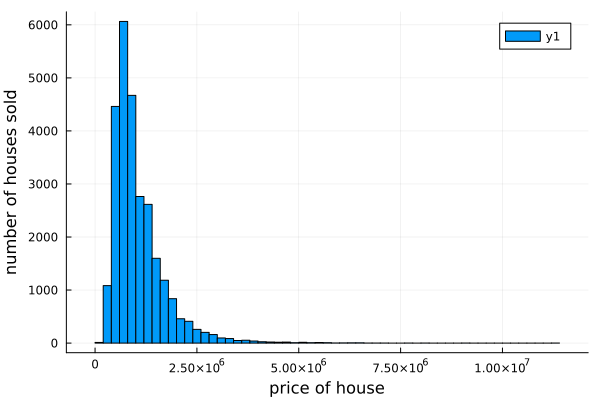

In [3]:
histogram(df_price.Price, nbins = 100, xlabel = "price of house", ylabel = "number of houses sold")

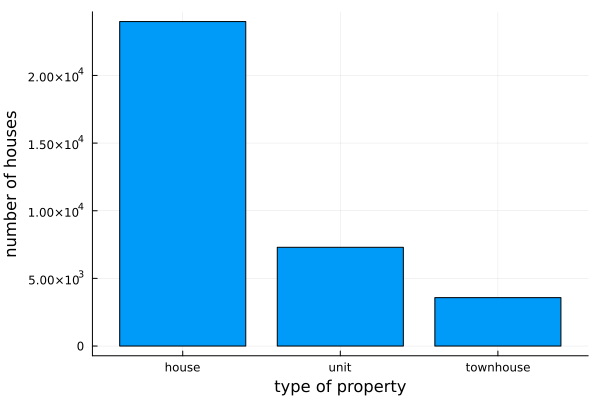

In [5]:
houses = []
push!(houses, size(filter(rows -> rows.Type == "h", df))[1])
push!(houses, size(filter(rows -> rows.Type == "u", df))[1])
push!(houses, size(filter(rows -> rows.Type == "t", df))[1])
label = ["house", "unit", "townhouse"]
bar(label, houses, label = false, xlabel = "type of property", ylabel = "number of houses")


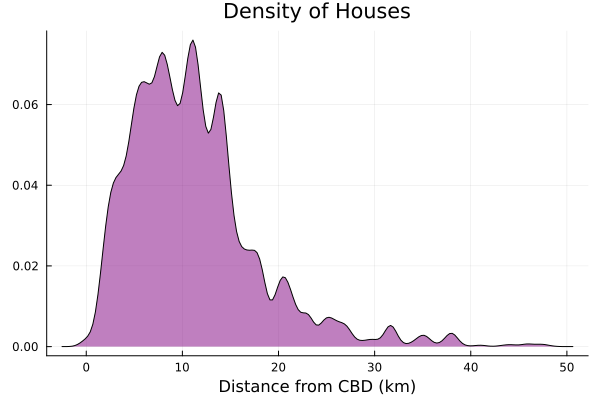

In [6]:
distance = dropmissing(df,:Distance).Distance
density(distance, label = false, title = "Density of Houses", xlabel = "Distance from CBD (km)", color = "black", fill = (0, 0.5, :purple))

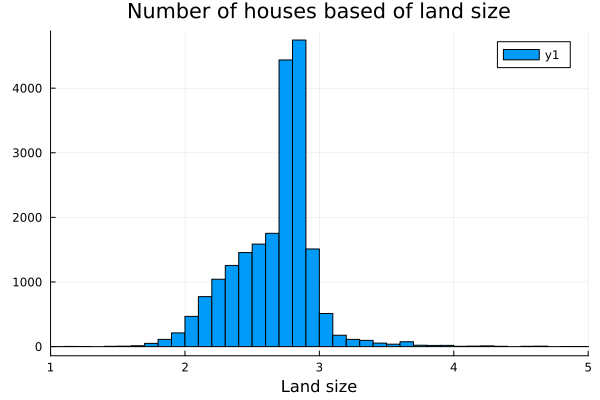

In [7]:
landsize = dropmissing(df,:Landsize).Landsize
deleteat!(landsize, findall(x -> x == 0,landsize))
landsizelog = map(x -> x == 0 ? x : log10(x), landsize)
histogram(landsizelog, nbins = 100, xlim = (1,5), title = "Number of houses based of land size", xlabel = "Land size")

The histogram above shows the number of houses base on land size in $m^2$. The x-axis is on a $\log_{10}$ scale. All properties with no landsize (units) were excluded from this plot.

### Task 1.2: Exploratory data analysis comparing variables

In [30]:
df_landsize = sort(dropmissing(df_price,:Landsize),:Landsize);


,Suburb,Address,Rooms,Type,Price,Method,SellerG
,String31,String31,Int64,String1,Int64,String3,String31
1,Abbotsford,6/241 Nicholson St,1,u,300000,S,Biggin
2,Abbotsford,411/8 Grosvenor St,2,u,700000,VB,Jellis
3,Abbotsford,123/56 Nicholson St,2,u,750000,S,Biggin
4,Abbotsford,7/20 Abbotsford St,1,u,441000,SP,Greg
5,Abbotsford,13/11 Nicholson St,3,t,900000,S,Beller
6,Abbotsford,6/219 Nicholson St,2,u,500000,S,Collins
7,Abbotsford,5/20 Abbotsford St,1,u,426000,SP,Greg
8,Abbotsford,116/56 Nicholson St,1,u,457000,S,Jellis
9,Abbotsford,31 Turner St,4,h,1542000,S,Collins


In [4]:
avg_price = [] 
for i in 1:16 
    avg = mean(df_price.Price[df_price.Rooms .== i]) / 1e6
    isnan(avg) ? push!(avg_price, 0) : push!(avg_price, avg) 
end

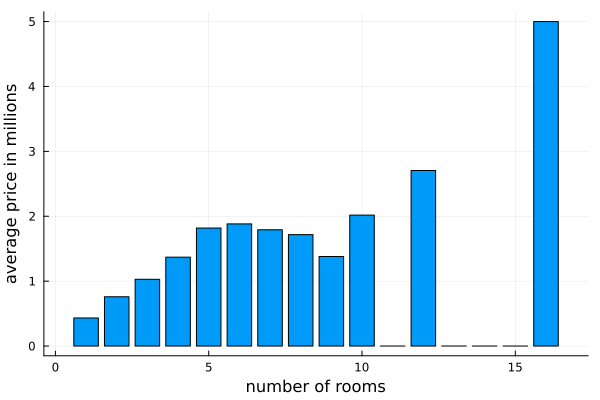

In [5]:
bar(avg_price,  xlabel = "number of rooms", ylabel = "average price in millions", legend = false)

### Task 1.3: Exploratory data analysis over time 

In [128]:
using Dates, SplitApplyCombine
df_date = copy(df)
df_date.Date = Date.(df.Date, "dd/mm/yyyy")
sort!(df_date,:Date)
transform!(df_date, :Date => ByRow(d -> Dates.format(d, "yyyy-mm")) => :DateYearMonth);
first(df_date,5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date
,String31,String31,Int64,String1,Int64?,String3,String31,Date
1,Canterbury,140 Canterbury Rd,4,h,missing,SP,Fletchers,2016-01-28
2,Surrey Hills,1/10 Florence Rd,2,u,813000,S,Fletchers,2016-01-28
3,Surrey Hills,999A Riversdale Rd,3,h,1205000,S,Fletchers,2016-01-28
4,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04
5,Abbotsford,18/659 Victoria St,3,u,missing,VB,Rounds,2016-02-04


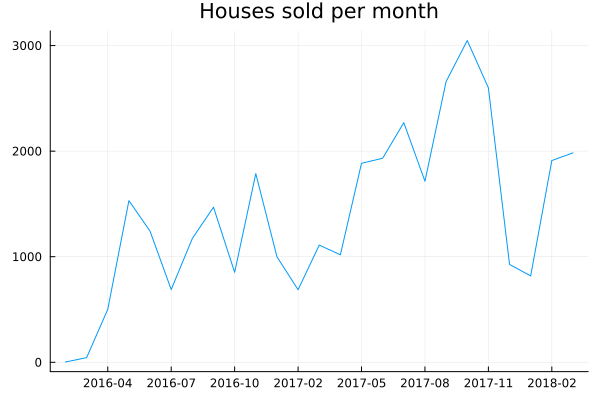

In [145]:
house_sales_by_day = groupcount(df_date.Date);
house_sales_by_month = groupcount(df_date.DateYearMonth);

#p1 = plot(collect(keys(house_sales_byday)), collect(values(house_sales_byday)), legend = false, title = "Houses sold per day")
plot(collect(keys(house_sales_by_month)), collect(values(house_sales_by_month)), legend = false, title = "Houses sold per month")
#plot(p1,p2, layout = (2,1))

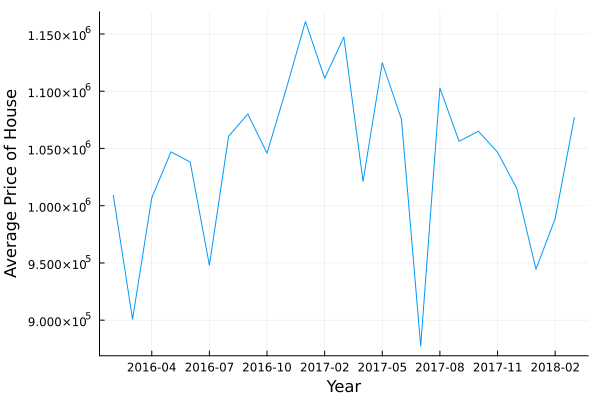

In [165]:
avg_price_by_month = combine(groupby(df_date, :DateYearMonth), :Price => mean ∘ skipmissing => :Price);
plot(avg_price_by_month.DateYearMonth, avg_price_by_month.Price, ylabel = "Average Price of House", xlabel = "Year", legend = false)


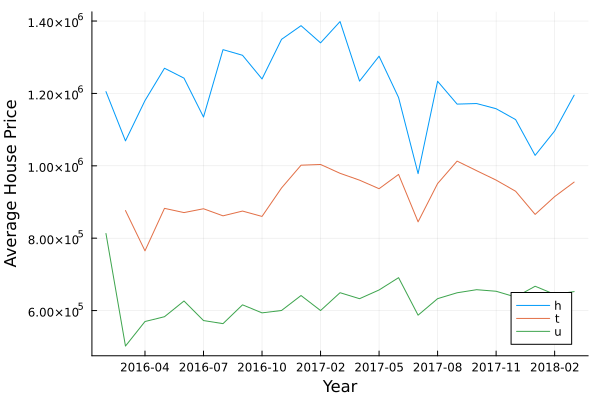

In [166]:
houses_by_type = groupby(df_date, [:DateYearMonth, :Type])
price_by_type = combine(houses_by_type, :Price => mean ∘ skipmissing => :Price)
plot(price_by_type.DateYearMonth, price_by_type.Price, ylabel = "Average House Price", xlabel = "Year", group = price_by_type.Type, legend = :bottomright)

All of the preceding plots show trends of the housing market over time. The plots of houses sold and average price of house sold are self explaintory. The plot showing the average price of a house sold seperated in the three respective types show that there is a clear price difference between houses, townhouses and units, with houses being the most expensive follewed by townhouses then units.

### Task 1.4: Linear Regression Models